In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('HousePrice.csv')
df=pd.DataFrame(data)
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [4]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


In [8]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [9]:
df['Area'].dtypes

dtype('O')

In [10]:
df.replace(',','', regex=True, inplace=True)

In [11]:
df['Area'][570]

' 3310000000 '

In [12]:
df['Area'] = pd.to_numeric(df['Area'])

In [13]:
df['Area'].dtypes

dtype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   int64  
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 301.2+ KB


In [15]:
df['Area'][570]

3310000000

In [16]:
for x in df.index:
  if df.loc[x, "Area"] >= 1000:
    df.drop(x, inplace = True)

In [17]:
df[568:573]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
569,84,2,True,True,True,Pardis,5.400000e+08,18000.00
571,84,2,True,True,True,Pardis,5.500000e+08,18333.33
572,80,2,True,True,False,Northern Janatabad,3.250000e+09,108333.33
573,863,2,True,True,True,Gheitarieh,7.830000e+09,261000.00
574,125,2,True,True,True,Kamranieh,8.700000e+09,290000.00


In [18]:
df[['Area','Price']].head(10)

,Area,Price
0,63,1.850000e+09
1,60,1.850000e+09
2,79,5.500000e+08
3,95,9.025000e+08
4,123,7.000000e+09
5,70,2.050000e+09
6,87,6.000000e+08
7,59,2.150000e+09
8,54,4.930000e+08
9,71,2.370000e+09


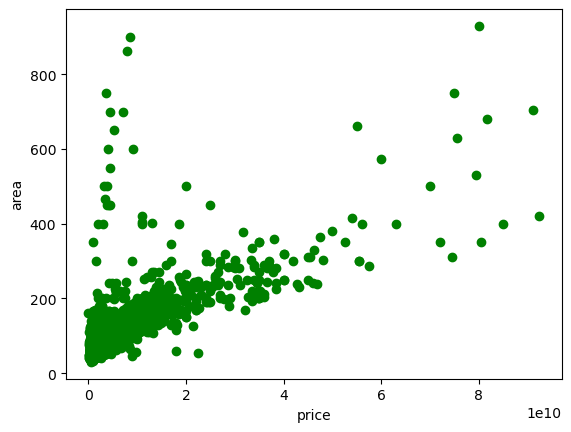

In [19]:
plt.scatter(df.Price, df.Area ,color='g')
plt.xlabel('price')
plt.ylabel('area')
plt.show()

In [20]:
df['Room'] = df['Room'].astype(int)
df['Parking'] = df['Parking'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)

In [21]:
df=pd.get_dummies(df,columns=['Address'], drop_first=True)

In [23]:
df.replace({False:0, True:1}, inplace= True)
df.head(5)

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_Abbasabad,Address_Absard,Address_Abuzar,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,63,1,1,1,1,1.850000e+09,61666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1.850000e+09,61666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,5.500000e+08,18333.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,9.025000e+08,30083.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,7.000000e+09,233333.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X = df.drop(['Price(USD)','Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.671310253730633e+33
R-squared: -61743524602109.09


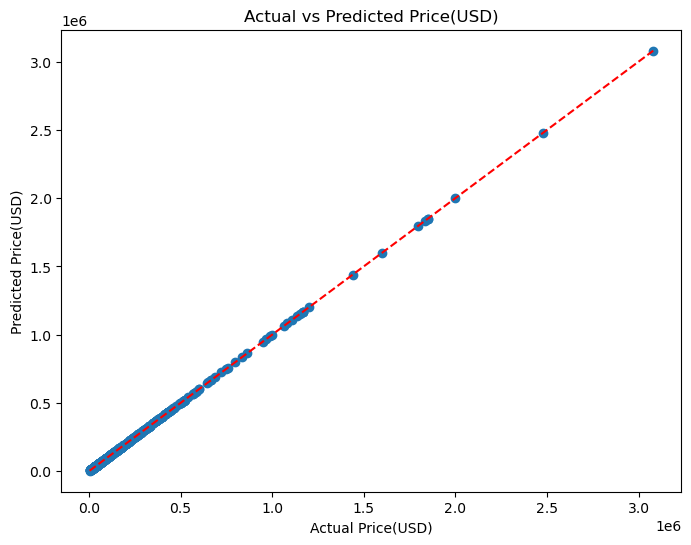

In [27]:
# Plot predicted vs actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Price(USD)')
plt.ylabel('Predicted Price(USD)')
plt.title('Actual vs Predicted Price(USD)')
plt.show()